# Parabilic SAR AF パラメータのスクリーニング・チェック

In [2]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [3]:
import os

import numpy as np
import pandas as pd
from matplotlib import (
    font_manager as fm,
    pyplot as plt,
)

In [24]:
date_target = '2025-03-27'
path_base = '../doe/results_Simple_SAR'

## 三菱重工業 (7011)

In [25]:
ods_name = os.path.join(path_base, 'summary_%s_7011.ods' % date_target)
ods_name
df_7011 = pd.read_excel(ods_name)
df_7011

,#,af_init,af_step,af_max,total
0,1,0,0.00005,0.0005,-1000
1,2,0,0.00010,0.0010,6900
2,3,0,0.00015,0.0015,200
3,4,0,0.00020,0.0020,600
4,5,0,0.00025,0.0025,600
...,...,...,...,...,...
195,196,0,0.00980,0.0980,2500
196,197,0,0.00985,0.0985,3000
197,198,0,0.00990,0.0990,3000
198,199,0,0.00995,0.0995,3100


## トヨタ自動車 (7203)

In [26]:
ods_name = os.path.join(path_base, 'summary_%s_7203.ods' % date_target)
ods_name
df_7203 = pd.read_excel(ods_name)
df_7203

,#,af_init,af_step,af_max,total
0,1,0,0.00005,0.0005,-400
1,2,0,0.00010,0.0010,3300
2,3,0,0.00015,0.0015,2100
3,4,0,0.00020,0.0020,-1500
4,5,0,0.00025,0.0025,-100
...,...,...,...,...,...
195,196,0,0.00980,0.0980,-1700
196,197,0,0.00985,0.0985,-2400
197,198,0,0.00990,0.0990,-2800
198,199,0,0.00995,0.0995,-2500


## 三菱ＵＦＪフィナンシャルＧ (8306)

In [27]:
ods_name = os.path.join(path_base, 'summary_%s_8306.ods' % date_target)
ods_name
df_8306 = pd.read_excel(ods_name)
df_8306

,#,af_init,af_step,af_max,total
0,1,0,0.00005,0.0005,900
1,2,0,0.00010,0.0010,700
2,3,0,0.00015,0.0015,2600
3,4,0,0.00020,0.0020,2500
4,5,0,0.00025,0.0025,-200
...,...,...,...,...,...
195,196,0,0.00980,0.0980,-1000
196,197,0,0.00985,0.0985,-1000
197,198,0,0.00990,0.0990,-600
198,199,0,0.00995,0.0995,-600


## AF step vs. Profit

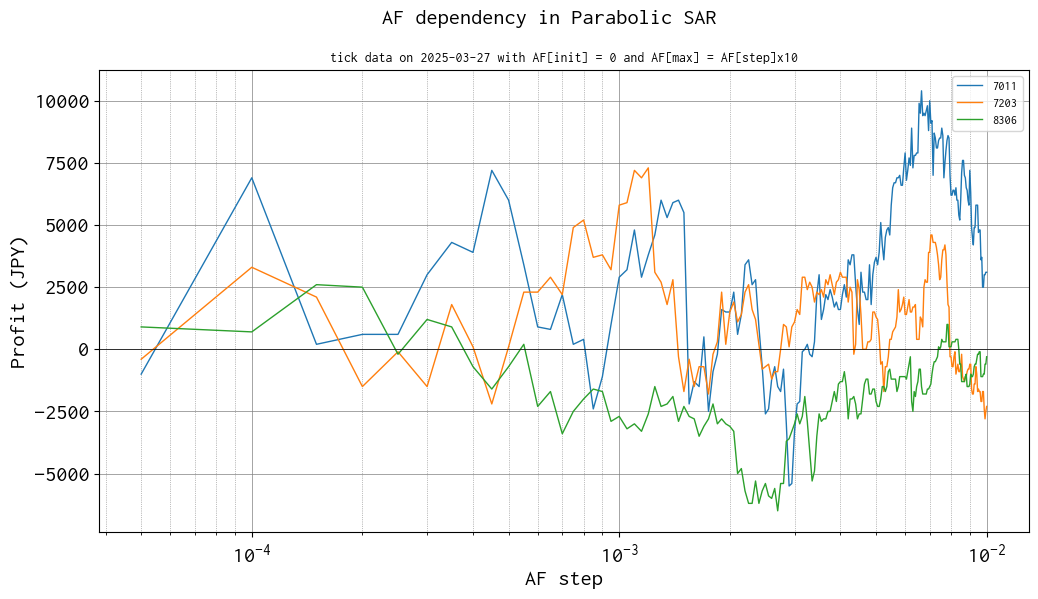

In [28]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

x = df_7011['af_step']
y = df_7011['total']
ax.plot(x, y, label='7011', lw=1)

x = df_7203['af_step']
y = df_7203['total']
ax.plot(x, y, label='7203', lw=1)

x = df_8306['af_step']
y = df_8306['total']
ax.plot(x, y, label='8306', lw=1)

ax.axhline(0, color='black', lw=0.5)
ax.set_xscale('log')
ax.grid(which='major', color='gray',linestyle='-', linewidth=0.5)
ax.grid(which='minor', color='gray',linestyle='dotted', linewidth=0.5)

ax.set_xlabel('AF step')
ax.set_ylabel('Profit (JPY)')
ax.legend(fontsize=9)

ax.set_title('tick data on %s with AF[init] = 0 and AF[max] = AF[step]x10' % date_target, fontsize=10)

plt.suptitle('AF dependency in Parabolic SAR', fontsize=16)
plt.savefig('./study_200_AF/%s.png' % date_target)
plt.show()